In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\useme\Downloads\titanic_dataset.csv')

# Exploratory data analysis

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data = pd.read_csv(r'C:\Users\useme\Downloads\titanic_dataset.csv',index_col='PassengerId')

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
import seaborn as sns

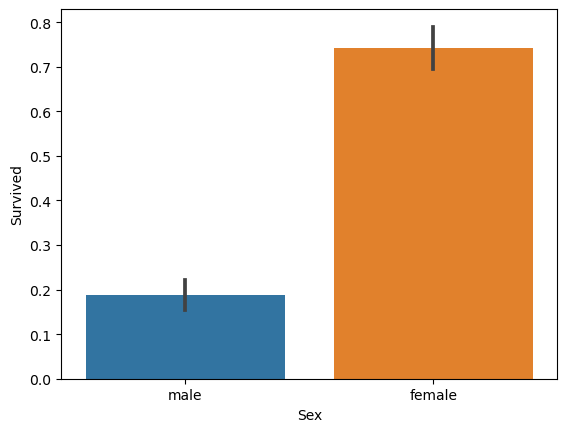

In [10]:
sns.barplot(data = data,x='Sex',y='Survived')
plt.show()

Inference: It is clear from the above plot that, female has higher survival rate than male.

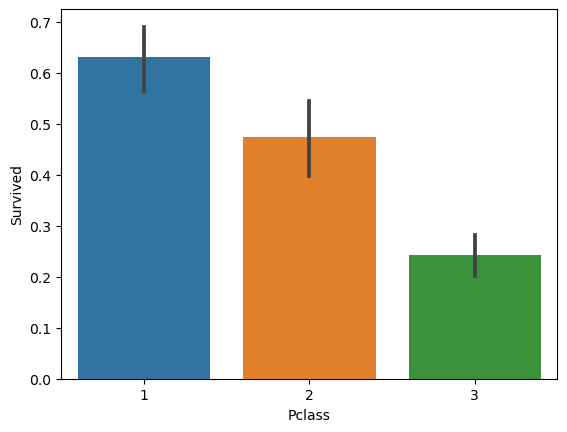

In [11]:
sns.barplot(data = data,x='Pclass',y='Survived')
plt.show()

Inference: Passengers from upper class has the highest survival rate which is near 65%.

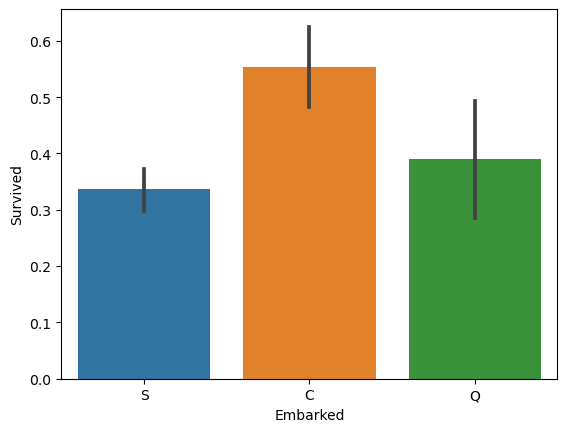

In [12]:
sns.barplot(data = data,x='Embarked',y='Survived')
plt.show()

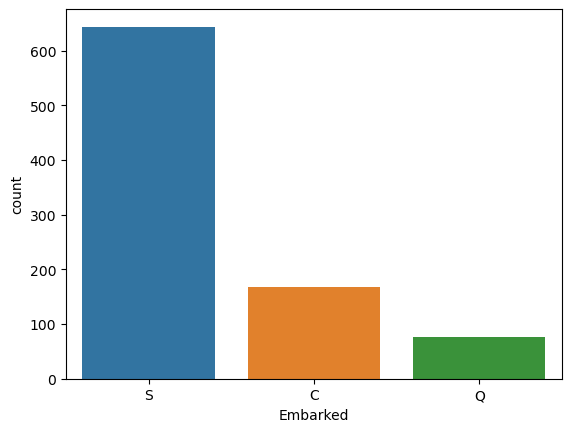

In [13]:
sns.countplot(data = data,x='Embarked')
plt.show()

Inference: The majority passengers embarked Titanic at the port of S(Southampton), but people embarked at C(Cherbourg) has the highest survival compared to others.

In [14]:
df = data[['Survived','Pclass','Age','SibSp','Parch','Fare']]

In [15]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

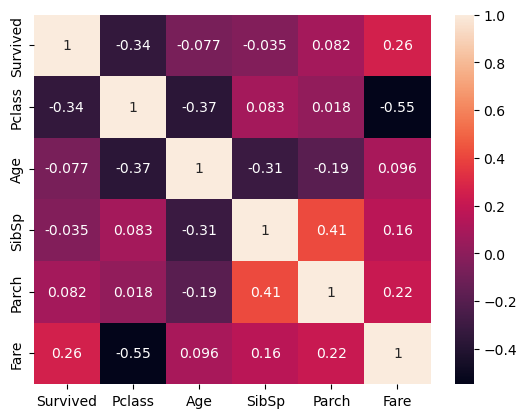

In [16]:
sns.heatmap(df.corr(),annot=True)

# Preprocessing steps

# 1. Checking the missing values

In [17]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

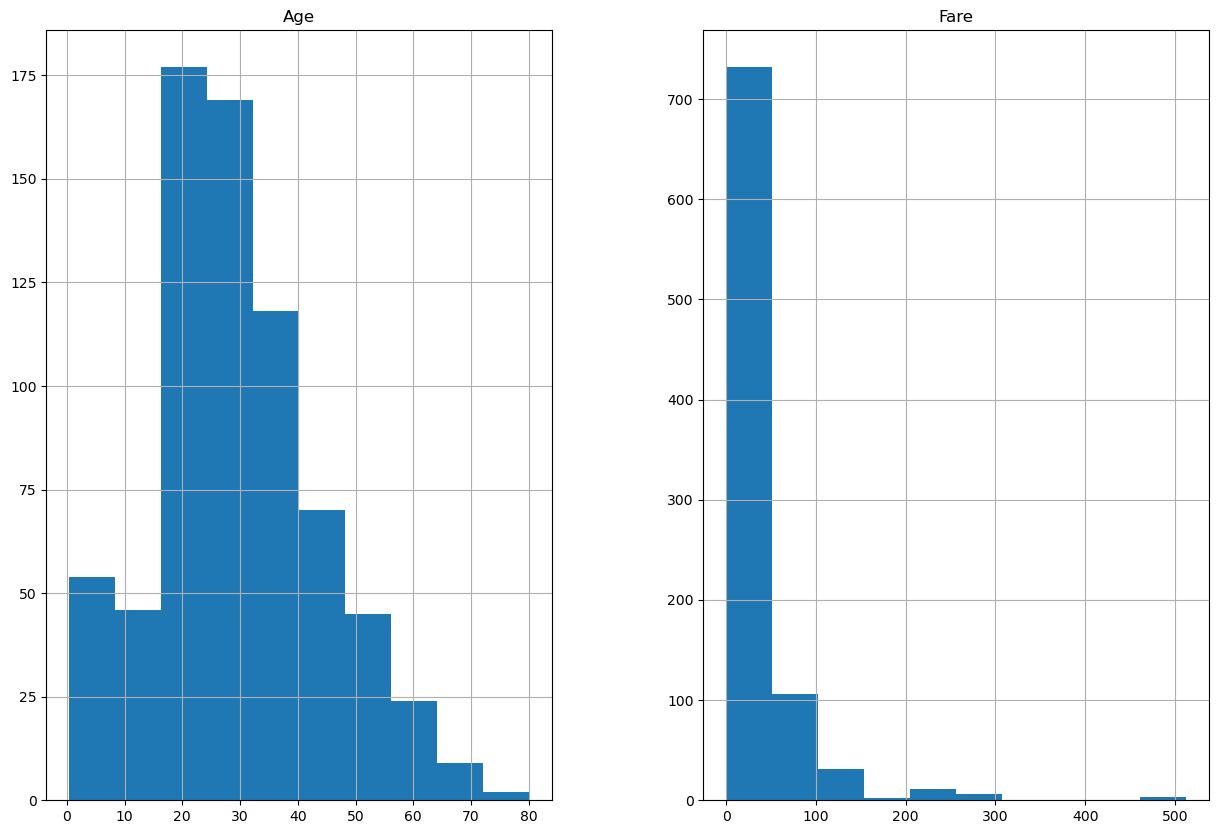

In [18]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,10))
plt.show()

In [19]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [20]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])

In [21]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [22]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 2. Outlier handling

In [23]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

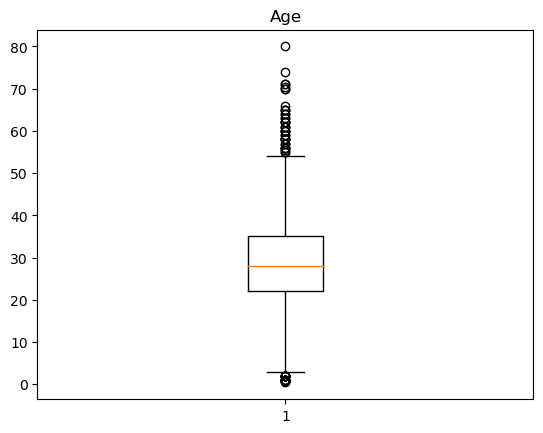

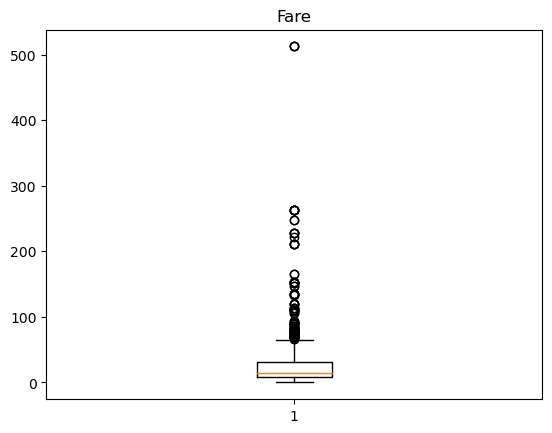

In [24]:
num_col=['Age','Fare']
for x in num_col:
    plt.figure()
    plt.boxplot(data[x])
    plt.title(x)

In [25]:
##outlier handling in Age column.

Q1 = data['Age'].quantile(0.25)
Q2 = data['Age'].quantile(0.50)
Q3 = data['Age'].quantile(0.75)

print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print('up_lim = ',up_lim)
print('low_lim = ',low_lim)

outlier=[]
for x in data['Age']:
    if (x<low_lim) or (x>up_lim):
        outlier.append(x)
print('outliers = ',outlier)

Q1 =  22.0
Q2 =  28.0
Q3 =  35.0
IQR =  13.0
up_lim =  54.5
low_lim =  2.5
outliers =  [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [26]:
data['Age'] = np.where(data['Age']>up_lim,up_lim,np.where(data['Age']<low_lim,low_lim,data['Age']))

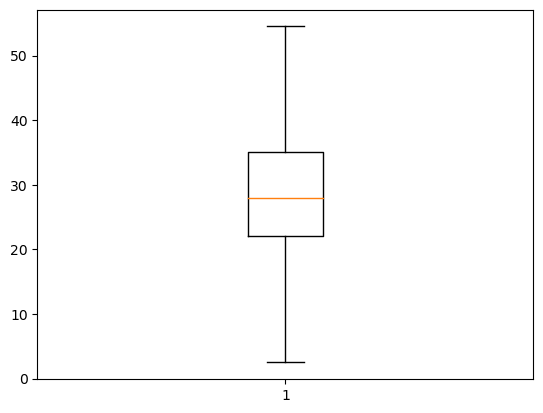

In [27]:
## Boxplot after outlier handling of Age column

plt.boxplot(data['Age'])
plt.show()

In [28]:
##outlier handling in Fare column.

Q1_fare = data['Fare'].quantile(0.25)
Q2_fare = data['Fare'].quantile(0.50)
Q3_fare = data['Fare'].quantile(0.75)

print('Q1 = ',Q1_fare)
print('Q2 = ',Q2_fare)
print('Q3 = ',Q3_fare)

IQR_fare = Q3_fare-Q1_fare
print('IQR = ',IQR_fare)

up_lim_fare = Q3_fare+1.5*IQR_fare
low_lim_fare = Q1_fare-1.5*IQR_fare
print('up_lim = ',up_lim_fare)
print('low_lim = ',low_lim_fare)

outlier_fare=[]
for x in data['Fare']:
    if (x<low_lim_fare) or (x>up_lim_fare):
        outlier_fare.append(x)
print('outliers = ',outlier_fare)

Q1 =  7.9104
Q2 =  14.4542
Q3 =  31.0
IQR =  23.0896
up_lim =  65.6344
low_lim =  -26.724
outliers =  [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.

In [29]:
data['Fare'] = np.where(data['Fare']>up_lim_fare,up_lim_fare,np.where(data['Fare']<low_lim_fare,low_lim_fare,data['Fare']))

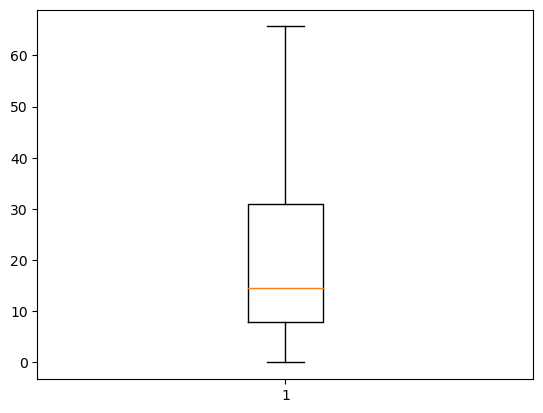

In [30]:
## Boxplot after outlier handling of Fare column
plt.boxplot(data['Fare'])
plt.show()

# 3. Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
Le = LabelEncoder()

In [33]:
data['Name'].nunique()

891

In [34]:
data['Sex'] = Le.fit_transform(data['Sex'])

In [35]:
data['Embarked'] = Le.fit_transform(data['Embarked'])

In [36]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,65.6344,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


In [37]:
data = data.drop(['Name','Ticket','Cabin'],axis=1)

In [38]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,65.6344,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


# Model Creation

# kNN 

In [39]:
#splitting data to feature and target
x = data.drop('Survived',axis=1)   #Features
y = data['Survived']               #Target

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [42]:
#Choosing k value
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    Classifier.fit(x_train,y_train)
    y_pred_knn=Classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

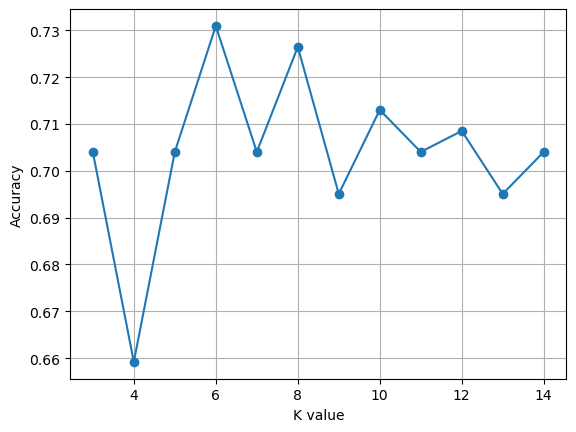

In [43]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

In [44]:
# Model creation using selected k value
Classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
Classifier.fit(x_train,y_train)
y_pred_knn=Classifier.predict(x_test)

In [45]:
#Checking the accuracy of the model
print('Accuracy score',accuracy_score(y_test,y_pred_knn))
print('Precision score',precision_score(y_test,y_pred_knn))
print('Recall score',recall_score(y_test,y_pred_knn))
print('F1 score',f1_score(y_test,y_pred_knn))

Accuracy score 0.7309417040358744
Precision score 0.7230769230769231
Recall score 0.5280898876404494
F1 score 0.6103896103896104


In [46]:
confusion_matrix(y_test,y_pred_knn)

array([[116,  18],
       [ 42,  47]], dtype=int64)

# SVM

In [47]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
y_pred_svm=svmclf.predict(x_test)

In [48]:
#Checking the accuracy of the model
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('Precision = ',precision_score(y_test,y_pred_svm))
print('Recall = ',recall_score(y_test,y_pred_svm))
print('f1 score = ',f1_score(y_test,y_pred_svm))
cm = confusion_matrix(y_test,y_pred_svm)
print('Confusion matrix =\n ',cm)

Accuracy =  0.7847533632286996
Precision =  0.7411764705882353
Recall =  0.7078651685393258
f1 score =  0.7241379310344828
Confusion matrix =
  [[112  22]
 [ 26  63]]


# K - fold cross validation 

In [49]:
from sklearn.model_selection import KFold

In [50]:
kfold_validator = KFold(11)

In [51]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index: ',train_index)
    print('Testing index: ',test_index)

Training index:  [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 3

In [52]:
from sklearn.model_selection import cross_val_score

## cross validation score of kNN model

In [53]:
cv_result = cross_val_score(Classifier,x,y,cv=kfold_validator)

In [54]:
cv_result

array([0.64197531, 0.74074074, 0.71604938, 0.75308642, 0.7654321 ,
       0.7037037 , 0.72839506, 0.7037037 , 0.71604938, 0.80246914,
       0.74074074])

In [55]:
cv_score = np.mean(cv_result)
print(cv_score)

0.728395061728395


## Cross validation score of SVM model 

In [56]:
cv_result_svm = cross_val_score(svmclf,x,y,cv=kfold_validator)

In [57]:
cv_result_svm

array([0.80246914, 0.82716049, 0.77777778, 0.77777778, 0.83950617,
       0.7654321 , 0.77777778, 0.71604938, 0.79012346, 0.79012346,
       0.79012346])

In [58]:
np.mean(cv_result_svm)

0.7867564534231201

# Stratified cross validation

In [59]:
from sklearn.model_selection import StratifiedKFold

In [60]:
skfold_validator = StratifiedKFold(n_splits=11)

In [61]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training index: ',train_index)
    print('Testing index: ',test_index)

Training index:  [ 74  78  79  81  82  84  85  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 3

## Stratified cross validation score of kNN model

In [62]:
skcv_result = cross_val_score(Classifier,x,y,cv=skfold_validator)

In [63]:
skcv_result

array([0.64197531, 0.71604938, 0.7037037 , 0.79012346, 0.77777778,
       0.67901235, 0.72839506, 0.71604938, 0.75308642, 0.79012346,
       0.72839506])

In [64]:
skcv_score = np.mean(skcv_result)
print(skcv_score)

0.7295173961840629


## Stratified cross validation score of SVM model

In [65]:
skcv_result_svm = cross_val_score(svmclf,x,y,cv=skfold_validator)

In [66]:
skcv_result_svm

array([0.82716049, 0.77777778, 0.79012346, 0.79012346, 0.85185185,
       0.7654321 , 0.75308642, 0.75308642, 0.7654321 , 0.81481481,
       0.7654321 ])

In [67]:
np.mean(skcv_result_svm)

0.7867564534231201

## Conclusion: Before scaling the dataset SVM model is the best

# Creation of models after scaling the dataset

In [68]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,65.6344,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
std_scl = StandardScaler()

In [71]:
data[['Age','Fare']] = std_scl.fit_transform(data[['Age','Fare']])

In [72]:
# splitting the data to feature and target data
x1 = data.drop(['Survived'],axis=1)
y1 = data['Survived']

In [73]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.25,random_state=42)

# kNN model after scaling

In [74]:
#Choosing k value
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    Classifier.fit(x_train1,y_train1)
    y_pred_knn1=Classifier.predict(x_test1)
    acc = accuracy_score(y_test1,y_pred_knn1)
    metric.append(acc)

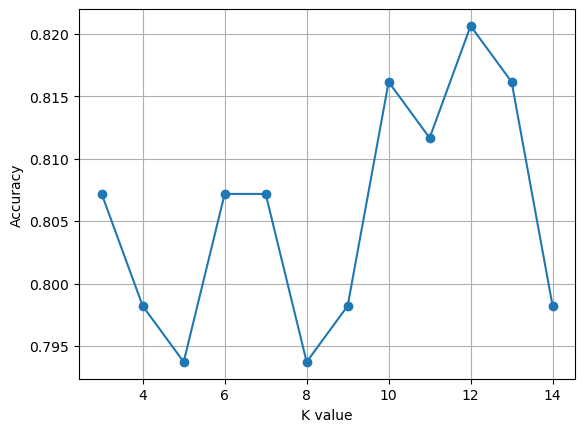

In [75]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

In [76]:
# Model creation using selected k value
Classifier=KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2)
model = Classifier.fit(x_train1,y_train1)
y_pred_knn1=model.predict(x_test1)

In [77]:
#Checking the accuracy of the model
print('Accuracy score',accuracy_score(y_test1,y_pred_knn1))
print('Precision score',precision_score(y_test1,y_pred_knn1))
print('Recall score',recall_score(y_test1,y_pred_knn1))
print('F1 score',f1_score(y_test1,y_pred_knn1))

Accuracy score 0.820627802690583
Precision score 0.810126582278481
Recall score 0.7191011235955056
F1 score 0.761904761904762


In [78]:
confusion_matrix(y_test1,y_pred_knn1)

array([[119,  15],
       [ 25,  64]], dtype=int64)

# SVM model after scaling

In [79]:
svmclf=SVC(kernel='linear')
model1 = svmclf.fit(x_train1,y_train1)
y_pred_svm1=model1.predict(x_test1)

In [80]:
#Checking the accuracy of the model
print('Accuracy = ',accuracy_score(y_test1,y_pred_svm1))
print('Precision = ',precision_score(y_test1,y_pred_svm1))
print('Recall = ',recall_score(y_test1,y_pred_svm1))
print('f1 score = ',f1_score(y_test1,y_pred_svm1))
cm = confusion_matrix(y_test1,y_pred_svm1)
print('Confusion matrix =\n ',cm)

Accuracy =  0.7847533632286996
Precision =  0.7411764705882353
Recall =  0.7078651685393258
f1 score =  0.7241379310344828
Confusion matrix =
  [[112  22]
 [ 26  63]]


# K - Fold Cross validation

In [81]:
for train_index,test_index in kfold_validator.split(x1,y1):
    print('Training index: ',train_index)
    print('Testing index: ',test_index)

Training index:  [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 3

## cross validation score of kNN model

In [82]:
cv_result1 = cross_val_score(model,x1,y1,cv=kfold_validator)

In [83]:
cv_result1

array([0.74074074, 0.77777778, 0.79012346, 0.80246914, 0.80246914,
       0.83950617, 0.80246914, 0.80246914, 0.74074074, 0.81481481,
       0.80246914])

In [84]:
np.mean(cv_result1)

0.7923681257014592

## Cross validation score of SVM model 

In [85]:
cv_result_svm1 = cross_val_score(model1,x1,y1,cv=kfold_validator)

In [86]:
cv_result_svm1

array([0.80246914, 0.82716049, 0.77777778, 0.77777778, 0.83950617,
       0.7654321 , 0.77777778, 0.71604938, 0.79012346, 0.79012346,
       0.79012346])

In [87]:
np.mean(cv_result_svm1)

0.7867564534231201

# Stratified cross validation

In [88]:
for train_index,test_index in skfold_validator.split(x1,y1):
    print('Training index: ',train_index)
    print('Testing index: ',test_index)

Training index:  [ 74  78  79  81  82  84  85  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 3

## Stratified cross validation score of kNN model

In [89]:
skcv_result1 = cross_val_score(model,x1,y1,cv=skfold_validator)

In [90]:
skcv_result1

array([0.7654321 , 0.75308642, 0.77777778, 0.81481481, 0.82716049,
       0.82716049, 0.81481481, 0.82716049, 0.75308642, 0.81481481,
       0.77777778])

In [91]:
np.mean(skcv_result1)

0.7957351290684624

## Stratified cross validation score of SVM model

In [92]:
skcv_result_svm1 = cross_val_score(model1,x1,y1,cv=skfold_validator)

In [93]:
skcv_result_svm1

array([0.82716049, 0.77777778, 0.79012346, 0.79012346, 0.85185185,
       0.7654321 , 0.75308642, 0.75308642, 0.7654321 , 0.81481481,
       0.7654321 ])

In [94]:
np.mean(skcv_result_svm1)

0.7867564534231201

## Conclusion: After scaling the dataset kNN model is the best.